In [3]:
!pip install pydrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
import pandas as pd

# Authenticate and create the PyDrive client
from google.colab import auth
auth.authenticate_user()

from oauth2client.client import GoogleCredentials
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Replace FILE_ID with the ID of your file in Google Drive
FILE_ID = "19XTo0hnE3AVrNgj_J9oqvg6oU1ma7h_N"  # Replace this with your file's unique ID
downloaded = drive.CreateFile({'id': FILE_ID})
downloaded.GetContentFile('data.xls')  # Change the file name and extension if necessary

# Load the Excel file into a Pandas DataFrame
df = pd.read_excel('data.xls')

print("Shape", df.shape)
print("Columns", df.columns)
# Display the first few rows of the dataset
df.head()



Shape (212, 31)
Columns Index(['Unnamed: 0', 'Sector',
       'Have you smoked at least one full tobacco cigarette (excluding e-cigarettes) once or more in the past 30 days?',
       'I see myself as someone who is extraverted, enthusiastic:',
       'I see myself as someone who is critical, quarrelsome:',
       'I see myself as someone who is dependable, self-disciplined:',
       'I see myself as someone who is anxious, easily upset:',
       'I see myself as someone who is open to new experiences:',
       'I see myself as someone who is reserved, quiet:',
       'I see myself as someone who is sympathetic, warm:',
       'I see myself as someone who is disorganized, careless:',
       'I see myself as someone who is calm, emotionally stable:',
       'I see myself as someone who is conventional, uncreative:', 'Gender:',
       'How old are you?',
       'Which governerate do you live in or spend most of your time in?',
       'What is the highest level of education you have attain

,Unnamed: 0,Sector,Have you smoked at least one full tobacco cigarette (excluding e-cigarettes) once or more in the past 30 days?,"I see myself as someone who is extraverted, enthusiastic:","I see myself as someone who is critical, quarrelsome:","I see myself as someone who is dependable, self-disciplined:","I see myself as someone who is anxious, easily upset:",I see myself as someone who is open to new experiences:,"I see myself as someone who is reserved, quiet:","I see myself as someone who is sympathetic, warm:",...,What is your main source of income?,What type of income or financial support does your household receive?,"If you receive payment in Lebanese Lira, what is your current estimated monthly household income? (If income is in US Dollars, then refer to the current black market exchange).",How would you describe your current income sufficiency?,"Including yourself, how many people currently live in your household?",To what extent were you financially (negatively) affected by the deterioration of the Lebanese economy?,How often do you exercise?,"On average, how many hours per day do you spend on social media for entertainment and social interaction (Facebook, Instagram, YouTube, etc...)?",How often do you feel stressed?,Employment Status
0,5,Private,Yes,Agree strongly,Disagree moderately,Agree strongly,Agree moderately,Agree strongly,Agree a little,Agree strongly,...,Own business income,Fully in Lebanese Lira,More than 20 million L.L,High: completely covers necessities with a few...,4,Very,Never,Between 2 and 3 hours,Frequently,Employed
1,11,Private,Yes,Agree moderately,Agree moderately,Agree moderately,Agree a little,Agree strongly,Disagree strongly,Agree strongly,...,Parents,Fully in US Dollars,More than 20 million L.L,High: completely covers necessities with a few...,4,Slightly,Often or at least 3 days every week,Between 2 and 3 hours,Occasionally,Unemployed
2,14,Private,Yes,Disagree moderately,Neither agree nor disagree,Agree a little,Agree moderately,Disagree a little,Agree moderately,Neither agree nor disagree,...,Parents,Fully in Lebanese Lira,I don't know,High: completely covers necessities with a few...,4,Moderately,Every day or at least 5 times every week,More than 4 hours,Constantly,Employed
3,15,Private,Yes,Agree strongly,Disagree moderately,Agree strongly,Disagree strongly,Agree strongly,Disagree moderately,Agree moderately,...,Parents,Mixed,I don't know,Medium: covers all basic needs,5,Moderately,Often or at least 3 days every week,Between 2 and 3 hours,Occasionally,Employed
4,16,Private,Yes,Agree a little,Agree a little,Agree strongly,Disagree moderately,Agree moderately,Agree strongly,Neither agree nor disagree,...,Investment,"Other, please specify",I prefer not to say,Medium: covers all basic needs,6,Slightly,Every day or at least 5 times every week,Less than 1 hour,Never,Employed


In [4]:
to_drop=['Unnamed: 0']

In [5]:
df.drop(columns=to_drop, inplace=True)
print("Dataset Shape After Dropping Columns:", df.shape)
print("Remaining Columns:")
print(df.columns)

Dataset Shape After Dropping Columns: (212, 30)
Remaining Columns:
Index(['Sector',
       'Have you smoked at least one full tobacco cigarette (excluding e-cigarettes) once or more in the past 30 days?',
       'I see myself as someone who is extraverted, enthusiastic:',
       'I see myself as someone who is critical, quarrelsome:',
       'I see myself as someone who is dependable, self-disciplined:',
       'I see myself as someone who is anxious, easily upset:',
       'I see myself as someone who is open to new experiences:',
       'I see myself as someone who is reserved, quiet:',
       'I see myself as someone who is sympathetic, warm:',
       'I see myself as someone who is disorganized, careless:',
       'I see myself as someone who is calm, emotionally stable:',
       'I see myself as someone who is conventional, uncreative:', 'Gender:',
       'How old are you?',
       'Which governerate do you live in or spend most of your time in?',
       'What is the highest level

In [6]:
# Define mappings for specific columns
ordinal_mappings = {
    'How often do you exercise?': {
        "Never": 0,
        "Sometimes or a few days every month": 1,
        "Often or at least 3 days every week": 2
    },
    'How would you describe your current income sufficiency?': {
        "Very low income: does not cover basic needs for a month": 0,
        "Low: barely covers basic needs for a month": 1,
        "Medium: covers all basic needs": 2,
        "High: completely covers necessities with a few luxury items": 3
    },
    'To what extent were you financially (negatively) affected by the deterioration of the Lebanese economy?': {
        "Not at all": 0,
        "Slightly": 1,
        "Moderately": 2,
        "Very": 3
    },
    'What is your current marital status?': {
        "Single": 0,
        "Engaged": 1,
        "Married": 2,
        "Other, please specify": 3
    },
    'What is the highest level of education you have attained?': {
        "Less than high school": 0,
        "High school degree or equivalent (e.g. GED)": 1,
        "Incomplete bachelor's degree": 2,
        "Graduate degree (MA/MS)": 3,
        "Post-graduate degree (PhD, MD, or other)": 4
    }
}

# Binary mapping for Yes/No
binary_mapping = {
    "Yes": 1,
    "No": 0
}

# Apply ordinal mappings
for col, mapping in ordinal_mappings.items():
    if col in df.columns:
        df[col] = df[col].replace(mapping)

# Apply binary mapping
binary_columns = ['Do you have close friends?']
for col in binary_columns:
    if col in df.columns:
        df[col] = df[col].replace(binary_mapping)

# Map non-ordinal categories to integers arbitrarily
categorical_columns = [
    'Sector',
    'Gender:',
    'Which governerate do you live in or spend most of your time in?',
    'What is your current employment status?',
    'What is your main source of income?',
    'What type of income or financial support does your household receive?',
    'Employment Status'
]

for col in categorical_columns:
    if col in df.columns:
        df[col] = df[col].astype('category').cat.codes

# Ensure numeric columns are properly handled
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())

# Verify the updated dataset
print("Updated Dataset with Numerical Columns:")
df.head()




Updated Dataset with Numerical Columns:


<ipython-input-6-be02bbaeb47d>:50: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace(binary_mapping)


,Sector,Have you smoked at least one full tobacco cigarette (excluding e-cigarettes) once or more in the past 30 days?,"I see myself as someone who is extraverted, enthusiastic:","I see myself as someone who is critical, quarrelsome:","I see myself as someone who is dependable, self-disciplined:","I see myself as someone who is anxious, easily upset:",I see myself as someone who is open to new experiences:,"I see myself as someone who is reserved, quiet:","I see myself as someone who is sympathetic, warm:","I see myself as someone who is disorganized, careless:",...,What is your main source of income?,What type of income or financial support does your household receive?,"If you receive payment in Lebanese Lira, what is your current estimated monthly household income? (If income is in US Dollars, then refer to the current black market exchange).",How would you describe your current income sufficiency?,"Including yourself, how many people currently live in your household?",To what extent were you financially (negatively) affected by the deterioration of the Lebanese economy?,How often do you exercise?,"On average, how many hours per day do you spend on social media for entertainment and social interaction (Facebook, Instagram, YouTube, etc...)?",How often do you feel stressed?,Employment Status
0,0,Yes,Agree strongly,Disagree moderately,Agree strongly,Agree moderately,Agree strongly,Agree a little,Agree strongly,Disagree a little,...,3,0,More than 20 million L.L,3,4,3,0,Between 2 and 3 hours,Frequently,0
1,0,Yes,Agree moderately,Agree moderately,Agree moderately,Agree a little,Agree strongly,Disagree strongly,Agree strongly,Neither agree nor disagree,...,4,1,More than 20 million L.L,3,4,1,2,Between 2 and 3 hours,Occasionally,1
2,0,Yes,Disagree moderately,Neither agree nor disagree,Agree a little,Agree moderately,Disagree a little,Agree moderately,Neither agree nor disagree,Agree a little,...,4,0,I don't know,3,4,2,Every day or at least 5 times every week,More than 4 hours,Constantly,0
3,0,Yes,Agree strongly,Disagree moderately,Agree strongly,Disagree strongly,Agree strongly,Disagree moderately,Agree moderately,Disagree strongly,...,4,2,I don't know,2,5,2,2,Between 2 and 3 hours,Occasionally,0
4,0,Yes,Agree a little,Agree a little,Agree strongly,Disagree moderately,Agree moderately,Agree strongly,Neither agree nor disagree,Disagree moderately,...,0,3,I prefer not to say,2,6,1,Every day or at least 5 times every week,Less than 1 hour,Never,0


In [7]:
# Identify non-numeric columns
non_numeric_columns = df.select_dtypes(include=['object']).columns
print("Non-Numeric Columns:", non_numeric_columns)

# Inspect unique values in non-numeric columns
for col in non_numeric_columns:
    print(f"Unique values in '{col}':", df[col].unique())

# Define additional mappings for problematic columns (e.g., 'Extremely')
additional_mappings = {
    'How often do you feel stressed?': {
        "Never": 0,
        "Rarely": 1,
        "Occasionally": 2,
        "Frequently": 3,
        "Constantly": 4,
        "Extremely": 5
    }
}

# Apply the additional mappings
for col, mapping in additional_mappings.items():
    if col in df.columns:
        df[col] = df[col].replace(mapping)

# Convert all remaining non-numeric columns to categorical codes
for col in non_numeric_columns:
    if col in df.columns:
        df[col] = df[col].astype('category').cat.codes

# Ensure numeric columns are properly handled
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())

# Verify the updated dataset
print("Updated Dataset with Numerical Columns:")
df.head()




Non-Numeric Columns: Index(['Have you smoked at least one full tobacco cigarette (excluding e-cigarettes) once or more in the past 30 days?',
       'I see myself as someone who is extraverted, enthusiastic:',
       'I see myself as someone who is critical, quarrelsome:',
       'I see myself as someone who is dependable, self-disciplined:',
       'I see myself as someone who is anxious, easily upset:',
       'I see myself as someone who is open to new experiences:',
       'I see myself as someone who is reserved, quiet:',
       'I see myself as someone who is sympathetic, warm:',
       'I see myself as someone who is disorganized, careless:',
       'I see myself as someone who is calm, emotionally stable:',
       'I see myself as someone who is conventional, uncreative:',
       'What is the highest level of education you have attained?',
       'What is your current marital status?',
       'If you receive payment in Lebanese Lira, what is your current estimated monthly house

<ipython-input-7-1b6fc6eb4790>:24: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace(mapping)


,Sector,Have you smoked at least one full tobacco cigarette (excluding e-cigarettes) once or more in the past 30 days?,"I see myself as someone who is extraverted, enthusiastic:","I see myself as someone who is critical, quarrelsome:","I see myself as someone who is dependable, self-disciplined:","I see myself as someone who is anxious, easily upset:",I see myself as someone who is open to new experiences:,"I see myself as someone who is reserved, quiet:","I see myself as someone who is sympathetic, warm:","I see myself as someone who is disorganized, careless:",...,What is your main source of income?,What type of income or financial support does your household receive?,"If you receive payment in Lebanese Lira, what is your current estimated monthly household income? (If income is in US Dollars, then refer to the current black market exchange).",How would you describe your current income sufficiency?,"Including yourself, how many people currently live in your household?",To what extent were you financially (negatively) affected by the deterioration of the Lebanese economy?,How often do you exercise?,"On average, how many hours per day do you spend on social media for entertainment and social interaction (Facebook, Instagram, YouTube, etc...)?",How often do you feel stressed?,Employment Status
0,0,0,2,4,2,1,2,0,2,3,...,3,0,8,3,4,3,0,1,3,0
1,0,0,1,1,1,0,2,5,2,6,...,4,1,8,3,4,1,2,1,2,1
2,0,0,4,5,0,1,3,1,6,0,...,4,0,5,3,4,2,3,5,4,0
3,0,0,2,4,2,5,2,4,1,5,...,4,2,5,2,5,2,2,1,2,0
4,0,0,0,0,2,4,1,2,6,4,...,0,3,6,2,6,1,3,4,0,0


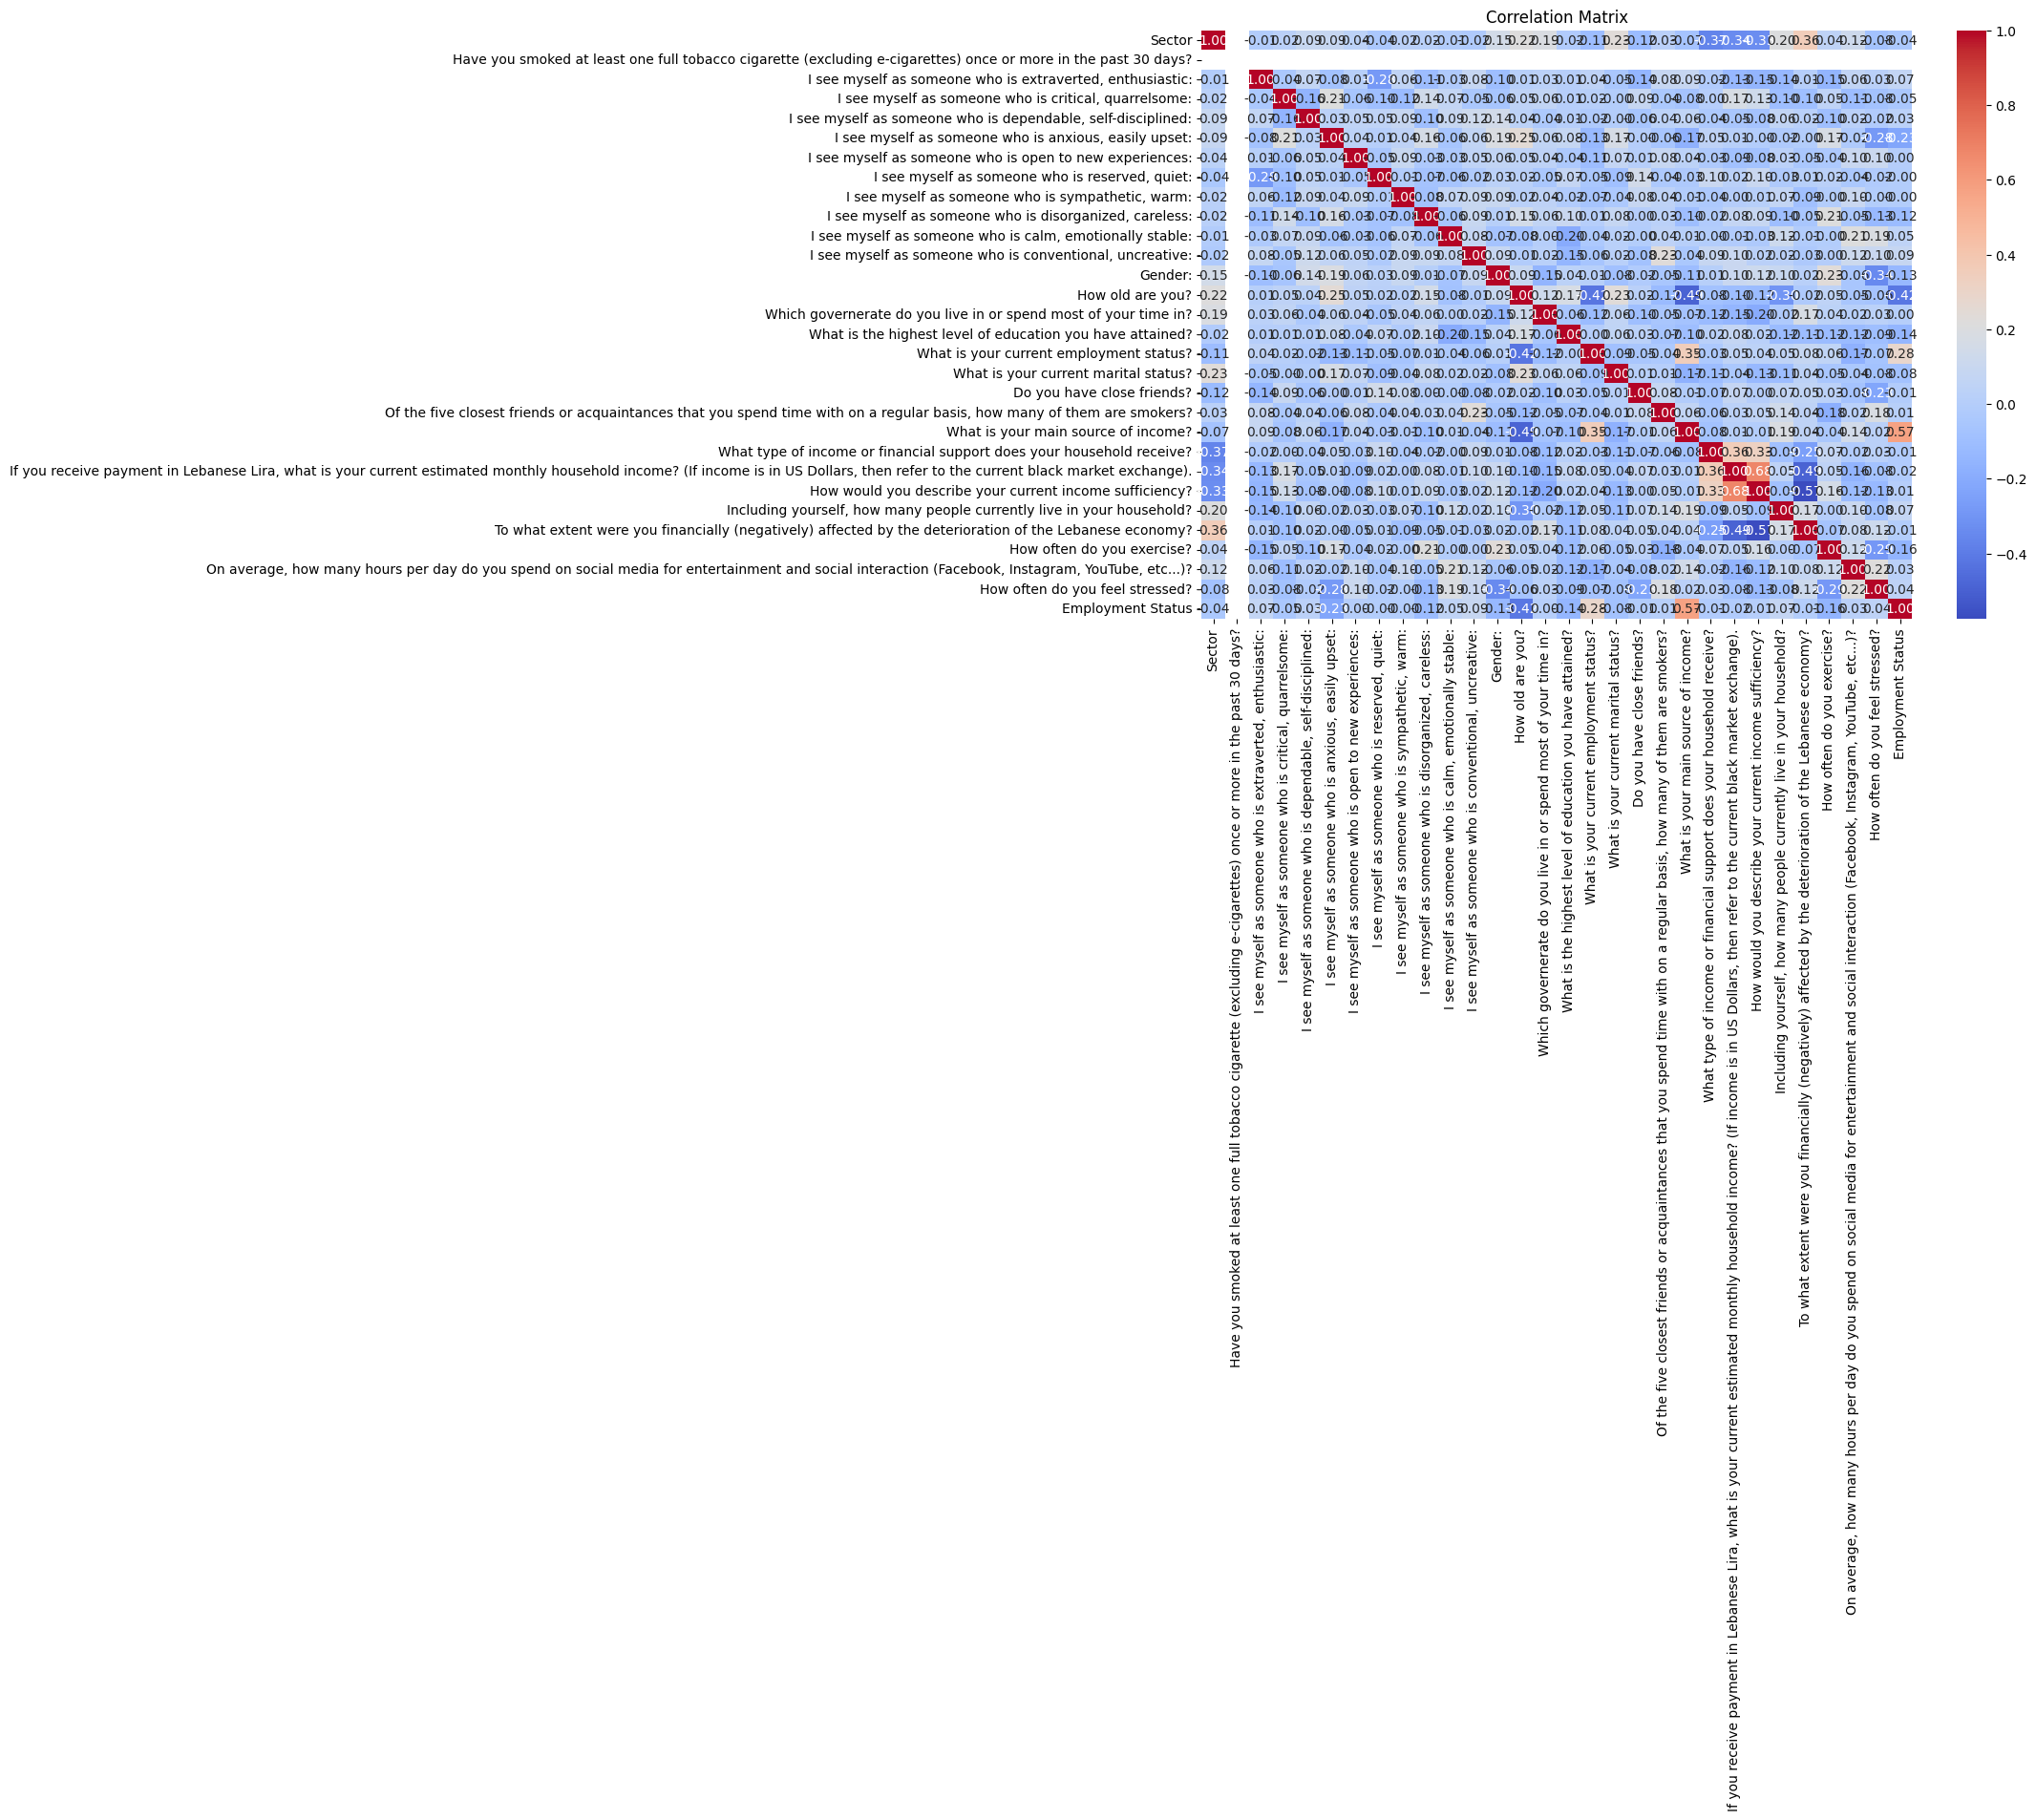

In [8]:
# Generate a correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [9]:
# Define the target column
target_column = 'Have you smoked at least one full tobacco cigarette (excluding e-cigarettes) once or more in the past 30 days?'



# Calculate correlation with the target variable
correlations = df.corr()[target_column].abs().sort_values(ascending=False)

# Select top 10 features (excluding the target itself)
top_features = correlations.index[1:21]  # Exclude the target itself
print("Top 10 Features Based on Correlation with the Target Variable:")
print(correlations[top_features])

# Create a new DataFrame with the top features and the target variable
selected_features_df = df[top_features].copy()
selected_features_df[target_column] = df[target_column]

# Display the new DataFrame
print("\nSelected Features DataFrame:")
selected_features_df.head()


Top 10 Features Based on Correlation with the Target Variable:
Have you smoked at least one full tobacco cigarette (excluding e-cigarettes) once or more in the past 30 days?            NaN
I see myself as someone who is extraverted, enthusiastic:                                                                 NaN
I see myself as someone who is critical, quarrelsome:                                                                     NaN
I see myself as someone who is dependable, self-disciplined:                                                              NaN
I see myself as someone who is anxious, easily upset:                                                                     NaN
I see myself as someone who is open to new experiences:                                                                   NaN
I see myself as someone who is reserved, quiet:                                                                           NaN
I see myself as someone who is sympathetic, warm:      

,Have you smoked at least one full tobacco cigarette (excluding e-cigarettes) once or more in the past 30 days?,"I see myself as someone who is extraverted, enthusiastic:","I see myself as someone who is critical, quarrelsome:","I see myself as someone who is dependable, self-disciplined:","I see myself as someone who is anxious, easily upset:",I see myself as someone who is open to new experiences:,"I see myself as someone who is reserved, quiet:","I see myself as someone who is sympathetic, warm:","I see myself as someone who is disorganized, careless:","I see myself as someone who is calm, emotionally stable:","I see myself as someone who is conventional, uncreative:",Gender:,How old are you?,Which governerate do you live in or spend most of your time in?,What is the highest level of education you have attained?,What is your current employment status?,What is your current marital status?,Do you have close friends?,"Of the five closest friends or acquaintances that you spend time with on a regular basis, how many of them are smokers?",What is your main source of income?
0,0,2,4,2,1,2,0,2,3,0,5,1,28,5,3,0,1,1,5,3
1,0,1,1,1,0,2,5,2,6,2,6,1,20,1,1,5,0,1,5,4
2,0,4,5,0,1,3,1,6,0,6,1,1,24,1,3,6,0,1,4,4
3,0,2,4,2,5,2,4,1,5,6,5,1,21,1,2,6,0,1,5,4
4,0,0,0,2,4,1,2,6,4,2,5,1,21,1,2,0,0,1,1,0


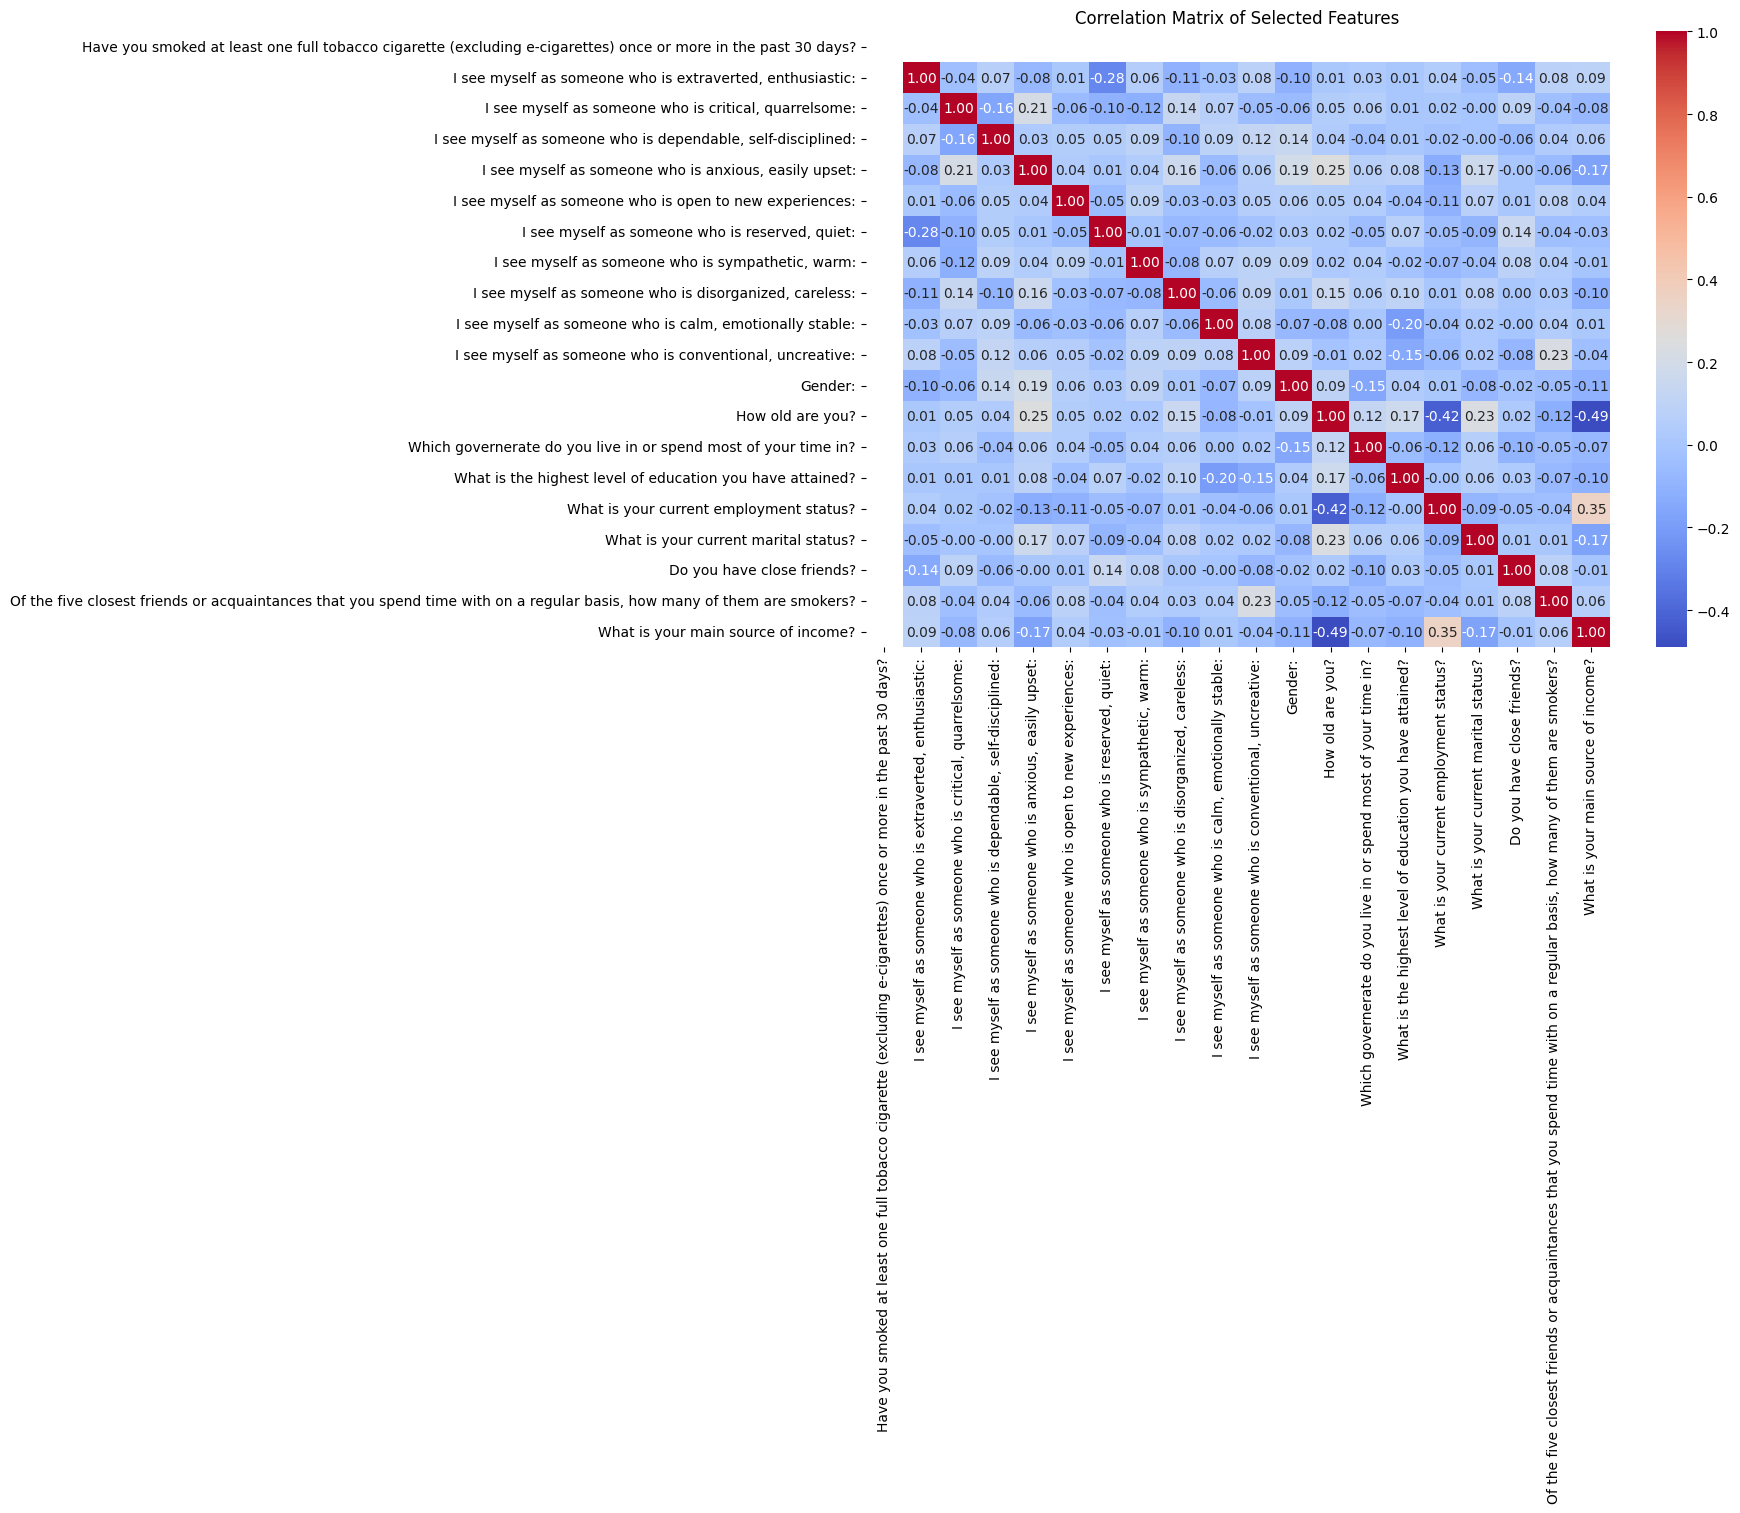

Final Selected Features DataFrame:
   Have you smoked at least one full tobacco cigarette (excluding e-cigarettes) once or more in the past 30 days?  \
0                                                  0                                                                
1                                                  0                                                                
2                                                  0                                                                
3                                                  0                                                                
4                                                  0                                                                

   I see myself as someone who is extraverted, enthusiastic:  \
0                                                  2           
1                                                  1           
2                                                  4           
3     

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [10]:
# Step 1: Verify numeric columns
selected_features_df = selected_features_df.loc[:, ~selected_features_df.columns.duplicated()]  # Remove duplicate columns
selected_features_df = selected_features_df.apply(pd.to_numeric, errors='coerce')  # Convert to numeric

# Step 2: Handle missing values (e.g., with median imputation)
selected_features_df.fillna(selected_features_df.median(), inplace=True)

# Step 3: Generate correlation matrix
correlation_matrix = selected_features_df.corr()

# Step 4: Plot the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix of Selected Features")
plt.show()

# Step 5: Export or save the cleaned DataFrame (optional)
print("Final Selected Features DataFrame:")
print(selected_features_df.head())

from google.colab import files

# Save the DataFrame to a CSV file
selected_features_df.to_csv("processed_selected_features.csv", index=False)

# Download the file
files.download("processed_selected_features.csv")


In [11]:
import pandas as pd
import numpy as np

# Create a copy to avoid modifying the original
processed_df = df.copy()

# List of categorical columns for one-hot encoding
categorical_columns = [
    'Gender:',
    'Which governerate do you live in or spend most of your time in?',
    'What is the highest level of education you have attained?',
    'What is your current employment status?',
    'What is your current marital status?',
    'Do you have close friends?',
    'What is your main source of income?'
]

# Convert personality trait columns to binary
personality_columns = [col for col in processed_df.columns if 'I see myself as someone who' in col]
for col in personality_columns:
    # Convert to numeric first
    processed_df[col] = pd.to_numeric(processed_df[col], errors='coerce')
    # Convert to binary based on median value
    median = processed_df[col].median()
    processed_df[col] = (processed_df[col] > median).astype(int)

# Convert age to binary (above/below median)
processed_df['How old are you?'] = (processed_df['How old are you?'] > processed_df['How old are you?'].median()).astype(int)

# Convert number of smoking friends to binary
friends_col = 'Of the five closest friends or acquaintances that you spend time with on a regular basis, how many of them are smokers?'
processed_df[friends_col] = (processed_df[friends_col] > processed_df[friends_col].median()).astype(int)

# Perform one-hot encoding for categorical columns
for column in categorical_columns:
    # Create dummy variables
    dummies = pd.get_dummies(processed_df[column], prefix=column.replace(' ', '_'))
    # Add dummy columns to processed DataFrame
    processed_df = pd.concat([processed_df, dummies], axis=1)
    # Drop the original categorical column
    processed_df.drop(column, axis=1, inplace=True)

# Ensure all values are either 0 or 1
for col in processed_df.columns:
    if processed_df[col].dtype in ['int64', 'float64']:
        processed_df[col] = (processed_df[col] > 0).astype(int)

# Print information about the processed dataset
print("Original shape:", df.shape)
print("Processed shape:", processed_df.shape)

# Verify all values are binary
print("\nVerifying all values are binary:")
for col in processed_df.columns:
    unique_vals = processed_df[col].unique()
    if not all(val in [0, 1] for val in unique_vals):
        print(f"Warning: Column {col} contains non-binary values: {unique_vals}")

# Display first few rows to verify binary conversion
print("\nFirst few rows of processed data:")
print(processed_df.head())

# Save to new DataFrame
binary_df = processed_df

binary_df.head()

Original shape: (212, 30)
Processed shape: (212, 60)

Verifying all values are binary:

First few rows of processed data:
   Sector  \
0       0   
1       0   
2       0   
3       0   
4       0   

   Have you smoked at least one full tobacco cigarette (excluding e-cigarettes) once or more in the past 30 days?  \
0                                                  0                                                                
1                                                  0                                                                
2                                                  0                                                                
3                                                  0                                                                
4                                                  0                                                                

   I see myself as someone who is extraverted, enthusiastic:  \
0                               

,Sector,Have you smoked at least one full tobacco cigarette (excluding e-cigarettes) once or more in the past 30 days?,"I see myself as someone who is extraverted, enthusiastic:","I see myself as someone who is critical, quarrelsome:","I see myself as someone who is dependable, self-disciplined:","I see myself as someone who is anxious, easily upset:",I see myself as someone who is open to new experiences:,"I see myself as someone who is reserved, quiet:","I see myself as someone who is sympathetic, warm:","I see myself as someone who is disorganized, careless:",...,What_is_your_current_marital_status?_2,What_is_your_current_marital_status?_3,What_is_your_current_marital_status?_4,Do_you_have_close_friends?_0,Do_you_have_close_friends?_1,What_is_your_main_source_of_income?_0,What_is_your_main_source_of_income?_1,What_is_your_main_source_of_income?_2,What_is_your_main_source_of_income?_3,What_is_your_main_source_of_income?_4
0,0,0,1,1,1,0,1,0,1,0,...,False,False,False,False,True,False,False,False,True,False
1,0,0,0,0,0,0,1,1,1,1,...,False,False,False,False,True,False,False,False,False,True
2,0,0,1,1,0,0,1,0,1,0,...,False,False,False,False,True,False,False,False,False,True
3,0,0,1,1,1,1,1,1,0,1,...,False,False,False,False,True,False,False,False,False,True
4,0,0,0,0,1,1,0,0,1,0,...,False,False,False,False,True,True,False,False,False,False


In [12]:
from google.colab import files

# Save the DataFrame to a CSV file
#binary_df.to_csv("binary_df.csv", index=False)

# Download the file
#files.download("binary_df.csv")

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

# Get target variable (y)
smoking_col = 'Have you smoked at least one full tobacco cigarette (excluding e-cigarettes) once or more in the past 30 days?'
y = binary_df[smoking_col]

# Get features (X) by dropping target column
X = binary_df.drop(smoking_col, axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Print model performance
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Get feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))

Model Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43

    accuracy                           1.00        43
   macro avg       1.00      1.00      1.00        43
weighted avg       1.00      1.00      1.00        43


Top 10 Most Important Features:
                                              feature  importance
0                                              Sector         0.0
44          What_is_your_current_employment_status?_5         0.0
32  What_is_the_highest_level_of_education_you_hav...         0.0
33  What_is_the_highest_level_of_education_you_hav...         0.0
34  What_is_the_highest_level_of_education_you_hav...         0.0
35  What_is_the_highest_level_of_education_you_hav...         0.0
36  What_is_the_highest_level_of_education_you_hav...         0.0
37  What_is_the_highest_level_of_education_you_hav...         0.0
38  What_is_the_highest_level_of_education_you_hav...   